# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [3]:
# Carregando o conjunto de dados "tips" do seaborn
df = sns.load_dataset("tips")

# Criando uma nova coluna 'tip_pct' que representa a porcentagem de gorjeta em relação à conta total
df['tip_pct'] = df['tip'] / (df['total_bill'] - df['tip'])

# Criando uma nova coluna 'net_bill' que representa o valor líquido da conta após subtrair a gorjeta
df['net_bill'] = df['total_bill'] - df['tip']

# Exibindo as cinco primeiras linhas do DataFrame resultante
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
# Criando um modelo de regressão linear usando a biblioteca statsmodels
reg = smf.ols("tip_pct ~ net_bill", data=df).fit()

In [5]:
# Exibindo um resumo estatístico do modelo de regressão linear
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.52e-06
Time:                        16:52:35   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0     -0.143883
1     -0.060707
2      0.002202
3     -0.017613
4     -0.004290
         ...   
239    0.092898
240   -0.071118
241   -0.081505
242   -0.097636
243   -0.018202
Length: 244, dtype: float64


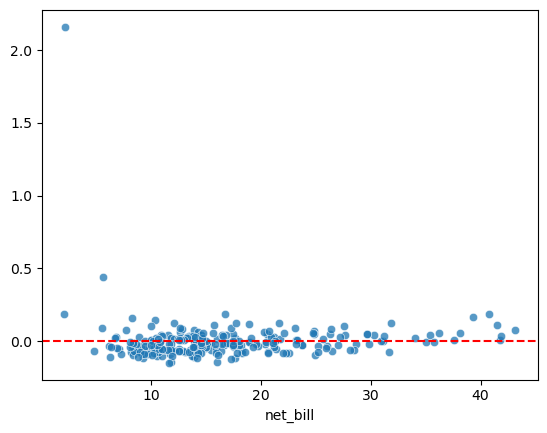

In [6]:
# Calculando os resíduos e exibindo um gráfico de dispersão
res = reg.resid
print(res)
sns.scatterplot(x='net_bill', y=res, data=df, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [7]:
# Ajustando um novo modelo de regressão linear usando o logaritmo natural de 'net_bill'
reg2 = smf.ols("tip_pct ~ np.log(net_bill)", data=df).fit()

# Exibindo o resumo estatístico do novo modelo
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.62e-13
Time:                        16:55:05   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054     11.444      0.000       0.512       0.724
np.log(net_bill)    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

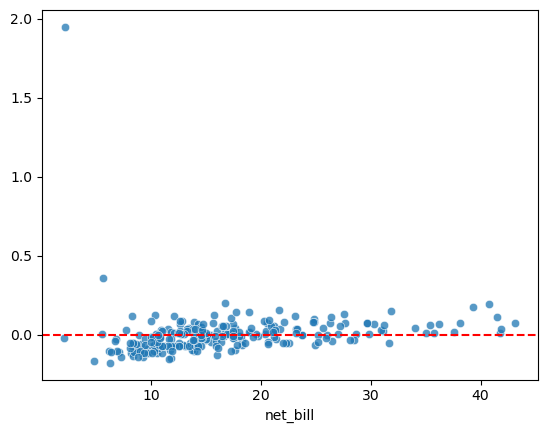

In [10]:
# Calculando os resíduos para o segundo modelo
res2 = reg2.resid

# Exibindo os resíduos em relação à variável 'net_bill' em um gráfico de dispersão
sns.scatterplot(x='net_bill', y=res2, data=df, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [11]:
# Criando um modelo de regressão quadrática
reg3 = smf.ols("tip_pct ~ net_bill + np.power(net_bill, 2)", data=df).fit()

# Exibindo o resumo estatístico do modelo
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.06e-09
Time:                        16:59:22   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.4851      0.047     10.332      0.000       0.393       0.578
net_bill                 -0.0268      0.005     -5.477      0.000      -0.036      -0.017
np.power(net_bill, 2)     0.0005      0.000      4.356      0.000       0.000       0.001
==============================================================================
Omnibus:                      447.620   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186035.672
Skew:                          10.140   Prob(JB):                         0.00
Kurtosis:                     136.744   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

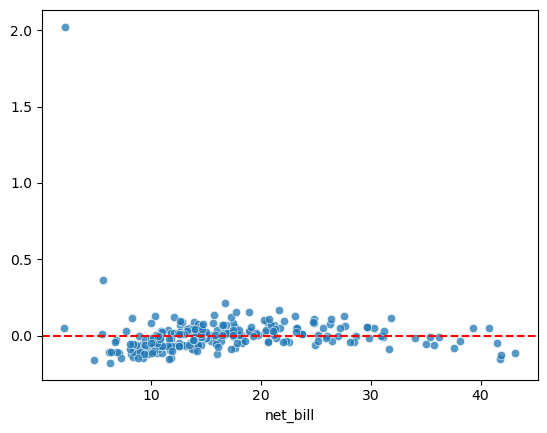

In [12]:
# Calculando os resíduos do modelo de regressão quadrática
res3 = reg3.resid

# Exibindo os resíduos em relação à variável 'net_bill' em um gráfico de dispersão
sns.scatterplot(x='net_bill', y=res3, data=df, alpha=0.75)

# Adicionando uma linha horizontal no eixo y, representando a linha de 0
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [13]:
# Ajustando um modelo de regressão linear logarítmica
reg4 = smf.ols("np.log(tip_pct) ~ net_bill", data=df).fit()

# Exibindo o resumo estatístico do modelo
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           8.27e-16
Time:                        17:00:28   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.000      -1.385      -1.165
net_bill      -0.0259      0.003     -8.630      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.929   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.392
Skew:                           0.664   Prob(JB):                     7.78e-57
Kurtosis:                       7.864   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Fazendo previsões e exibindo os resultados
y_pred4 = np.exp(reg4.fittedvalues)
y = df['tip_pct']

# Criando um DataFrame com as previsões e os valores reais
predictions4 = pd.DataFrame([y_pred4, y]).T
predictions4.columns = ['y_pred', 'y']
predictions4

,y_pred,y
0,0.184874,0.063204
1,0.223283,0.191244
2,0.177702,0.199886
3,0.165035,0.162494
4,0.162452,0.172069
...,...,...
239,0.153746,0.256166
240,0.145733,0.079428
241,0.163759,0.096759
242,0.184444,0.108899


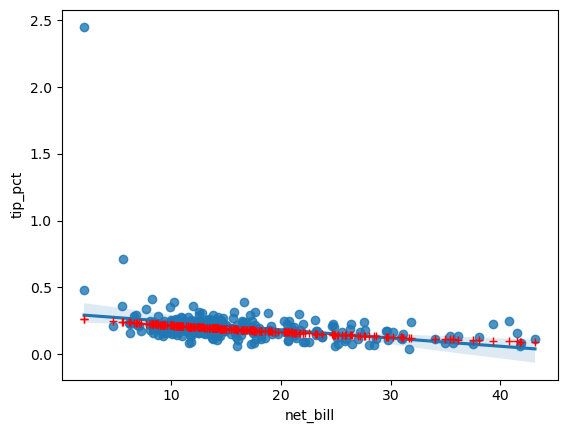

In [15]:
# Plotando a regressão linear e as previsões
sns.regplot(x='net_bill', y='tip_pct', data=df)
plt.plot(df['net_bill'], predictions4['y_pred'], 'r+')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [16]:
# Criando um modelo de regressão linear log-log
reg5 = smf.ols("np.log(tip_pct) ~ np.log(net_bill)", data=df).fit()
# Exibindo o resumo estatístico do modelo de regressão linear log-log
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           5.20e-20
Time:                        17:02:40   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)    -0.4849      0.048    -10.026      0.000      -0.580      -0.390
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Criando um DataFrame com as previsões do modelo log-log
y_pred5 = np.exp(reg5.fittedvalues)
y = df['tip_pct']

predictions5 = pd.DataFrame([y_pred5, y]).T
predictions5.columns = ['y_pred', 'y']
predictions5

,y_pred,y
0,0.175876,0.063204
1,0.236442,0.191244
2,0.168249,0.199886
3,0.156348,0.162494
4,0.154127,0.172069
...,...,...
239,0.147068,0.256166
240,0.141076,0.079428
241,0.155244,0.096759
242,0.175397,0.108899


In [18]:
# Calculando o coeficiente de determinação (R²) para o modelo log-log
r_squared_5 = predictions5.corr().iloc[0, 1] ** 2
r_squared_5

0.30894874740322265

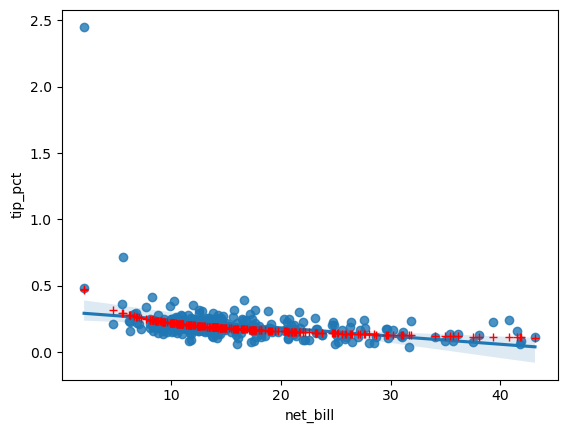

In [19]:
# Visualizando o ajuste do modelo log-log
sns.regplot(x='net_bill', y='tip_pct', data=df)
plt.plot(df['net_bill'], predictions5['y_pred'], 'r+')

###  6. qual modelo resultou no melhor ajuste?


O modelo 5 é preferível, pois exibe o R² mais elevado (0,30) e demonstra um ajuste superior conforme indicado nos gráficos.